In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [2]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

---------------------------------------
printTest
---------------------------------------
---------------------------------------
cyan
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
green
---------------------------------------
---------------------------------------
yellow
---------------------------------------
---------------------------------------
blue
---------------------------------------
---------------------------------------
magenta
---------------------------------------
---------------------------------------
white
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
                RESTART                
---------------------------------------
---------------------------------------
                SET LOG                
-------------------------

In [3]:
jmfile = 'test_025.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(2)

/home/ubuntu/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684574617961,351,HTTP Request FIBO,500,NaN,Thread Group FIBO-ThreadStarter 1-1,text,False,NaN,314,140,44,94,http://193.225.250.30/cpu/fibonacci_no_gc/Fibo,351,0,8,500,200
1,1684574617983,939,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-8,text,True,NaN,324,138,43,93,http://193.225.250.30/cpu/fibonacci_no_gc/16,939,0,9,500,200


In [4]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

print(FIBO.shape)
print(PRIME.shape)

(18800, 19)
(18700, 19)


In [7]:
jf = jf.astype({'timeStamp':'int'})
FIBO  = FIBO.astype({'timeStamp':'int'})
PRIME = PRIME.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
FIBO['date'] = FIBO['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
PRIME['date'] = PRIME['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

FIBO.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1684574617961,351,HTTP Request FIBO,500,NaN,Thread Group FIBO-ThreadStarter 1-1,text,False,NaN,314,140,44,94,http://193.225.250.30/cpu/fibonacci_no_gc/Fibo,351,0,8,500,200,2023-05-20 09:23:37.961
1,1684574617983,939,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-8,text,True,NaN,324,138,43,93,http://193.225.250.30/cpu/fibonacci_no_gc/16,939,0,9,500,200,2023-05-20 09:23:37.983


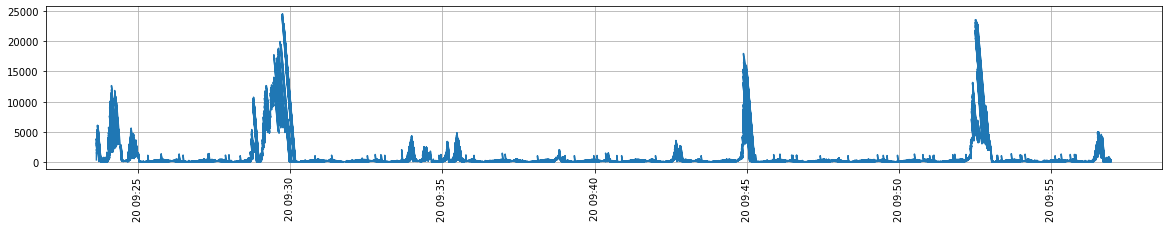

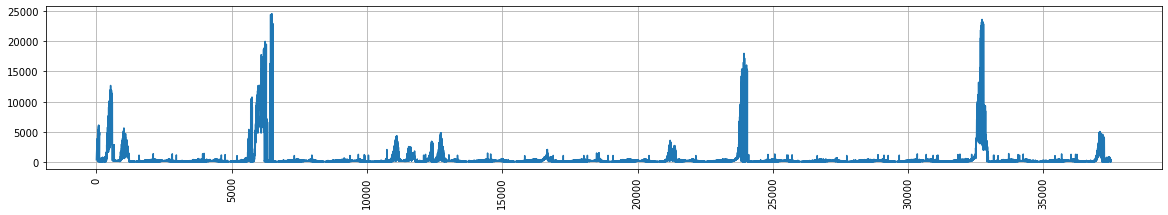

In [8]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

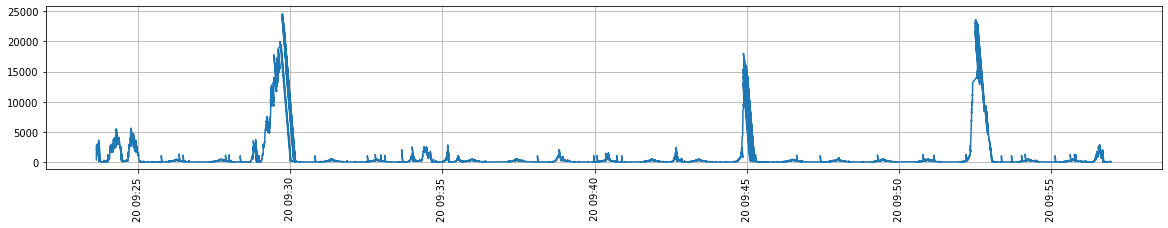

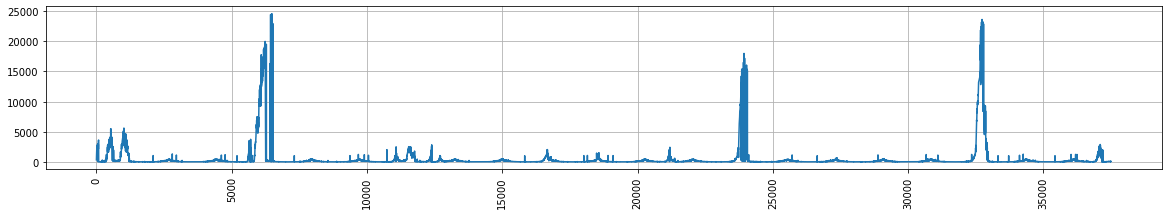

In [27]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

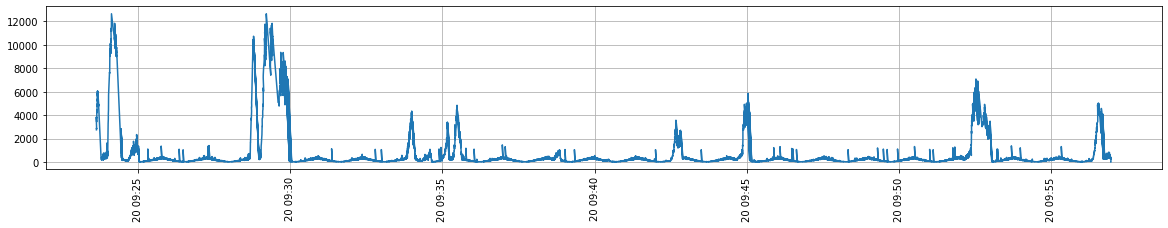

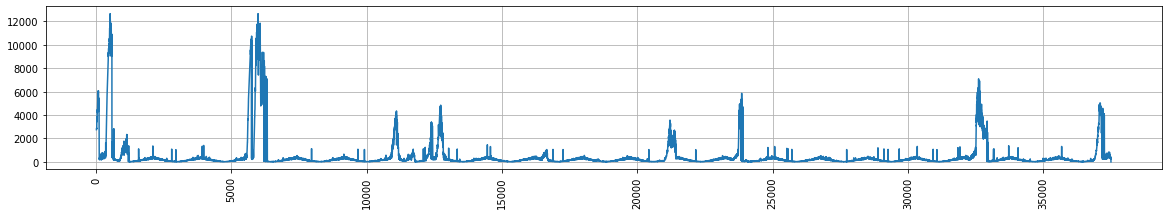

In [30]:
plt.figure(figsize=(20, 3))
plt.plot(PRIME['date'], PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

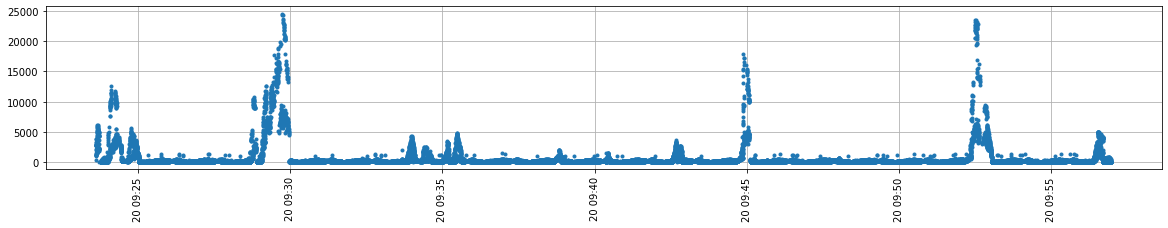

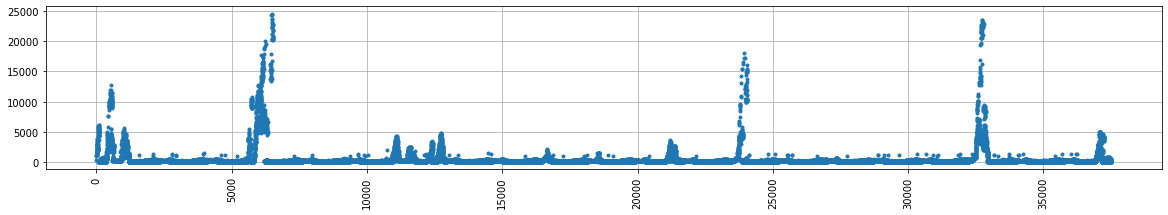

In [31]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [32]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

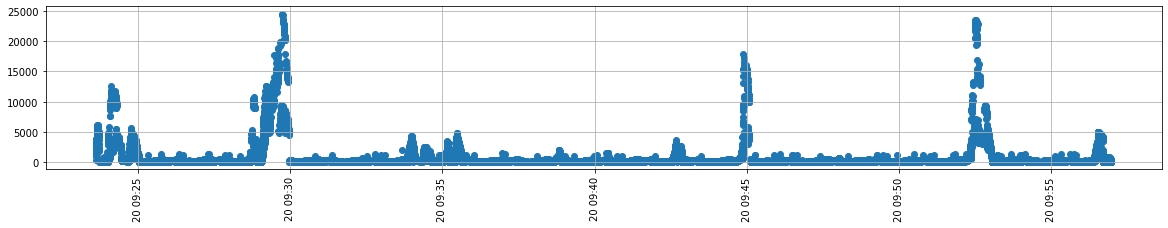

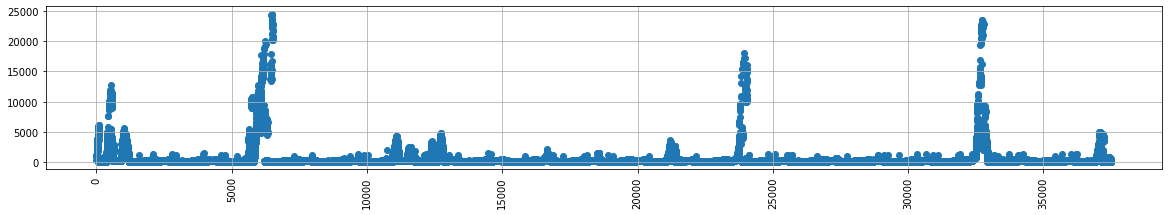

In [33]:
plt.figure(figsize=(20, 3))
plt.scatter(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(jf['_x'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [34]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


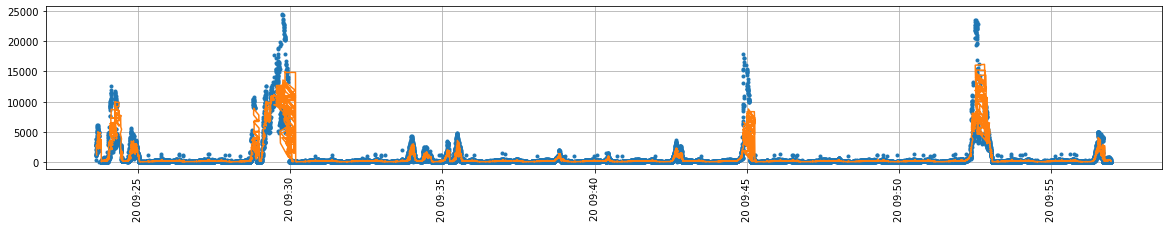

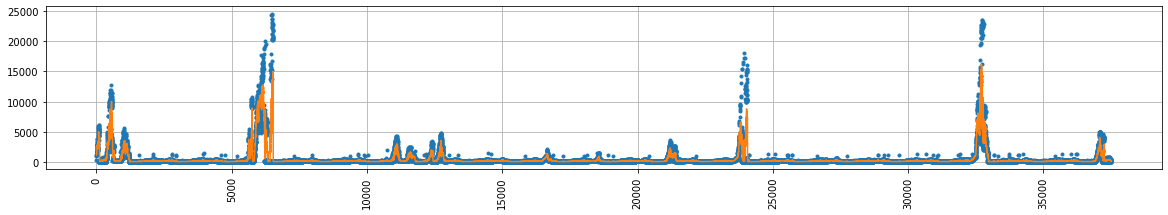

In [35]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [36]:
jf.groupby([jf['date'].dt.hour]).Latency.sum()

date
9    17460365
Name: Latency, dtype: int64

In [37]:
jf.groupby([jf['date'].dt.minute]).Latency.sum()

date
23     391246
24    1707997
25     166824
26     134977
27     189786
28     568132
29    4390226
30     130680
31     141557
32     195463
33     305997
34     509871
35     626488
36     127665
37     151713
38     303892
39     130689
40     175868
41     184819
42     464872
43     148086
44     728070
45     774053
46     167035
47     169859
48     127205
49     160576
50     183129
51     133295
52    2695520
53     232134
54     134937
55     193896
56     613808
Name: Latency, dtype: int64

In [38]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
9     23      1089.821727
      24      2093.133578
      25       140.070529
      26       113.330814
      27       158.949749
      28       548.919807
      29      8115.020333
      30       109.538977
      31       118.556951
      32       163.979027
      33       262.658369
      34       451.612932
      35       580.619092
      36       106.922111
      37       127.382872
      38       260.181507
      39       109.089316
      40       148.914479
      41       154.789782
      42       409.578855
      43       123.817726
      44       670.414365
      45       691.736372
      46       140.601852
      47       142.499161
      48       106.358696
      49       134.598491
      50       153.889916
      51       111.543933
      52      3365.193508
      53       198.915167
      54       113.202181
      55       162.391960
      56       584.022835
Name: Latency, dtype: float64

In [39]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

37

In [40]:
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [41]:
md = jf.groupby([jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [42]:
md

date  date
23    37      2198.550000
      38      2690.285714
      39      3727.600000
      40      4079.400000
      41      3766.631579
                 ...     
56    54       333.842105
      55       287.700000
      56       246.400000
      57       150.950000
      58        80.500000
Name: Latency, Length: 1990, dtype: float64

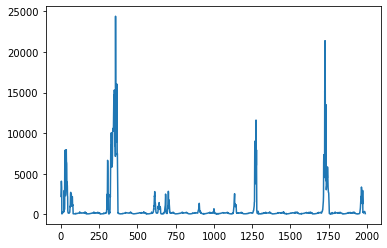

In [43]:
plt.plot(md.values)

In [79]:
_minutes = md.index.levels[0]
_seconds = md.index.levels[1]

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))

 sec min 0 sec max 59
 min min 23 min max 56


In [90]:
tt = []
tp = []

start_date = str(jf['date'].loc[0])[:14]

for _ in md.index:
    m = _[0]
    s = _[1]
    tp.append(start_date + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-20 09:23:37,2198.550000
1,2023-05-20 09:23:38,2690.285714
2,2023-05-20 09:23:39,3727.600000
3,2023-05-20 09:23:40,4079.400000
4,2023-05-20 09:23:41,3766.631579


In [94]:
mz = jf.groupby([jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  sec
23    3      2892.351852
      4      1615.285714
      5       280.554404
24    0      3911.288136
      1      5655.030000
                ...     
56    1        63.535000
      2       626.174419
      3      2432.109489
      4       583.126374
      5       272.981250
Name: Latency, Length: 201, dtype: float64

In [128]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:14]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    m = _[0]
    s = _[1]
    if c == 0:
        c += 1
        tt.append([m, s])
        tz.append(start_date + str(m) + ':' + str(_first_sec))
    else:
        tt.append([m, s])
        tz.append(start_date + str(m) + ':' + str(s*10))
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

,date,md
0,2023-05-20 09:23:37,2892.351852
1,2023-05-20 09:23:40,1615.285714
2,2023-05-20 09:23:50,280.554404
3,2023-05-20 09:24:00,3911.288136
4,2023-05-20 09:24:10,5655.030000


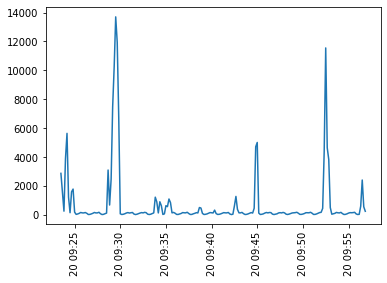

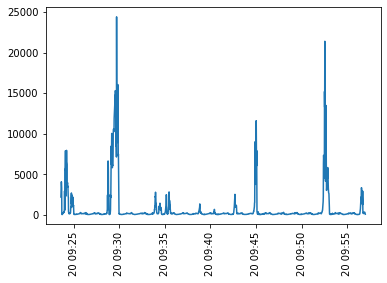

In [119]:
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [130]:
print(tp['date'][0])
print(tz['date'][0])

2023-05-20 09:23:37
2023-05-20 09:23:37


In [132]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

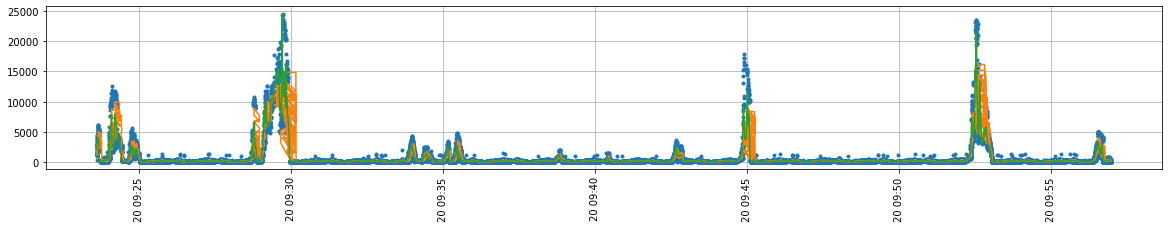

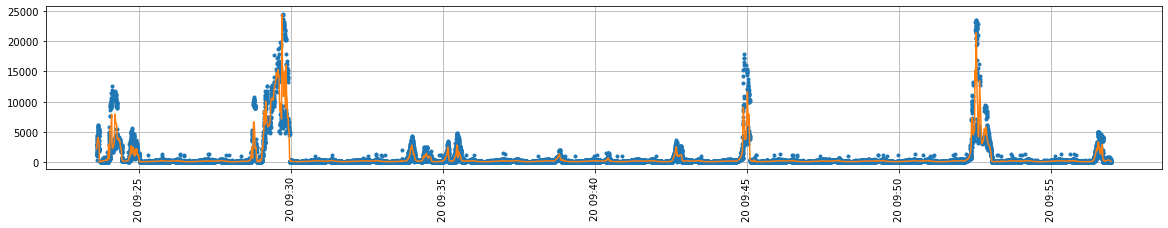

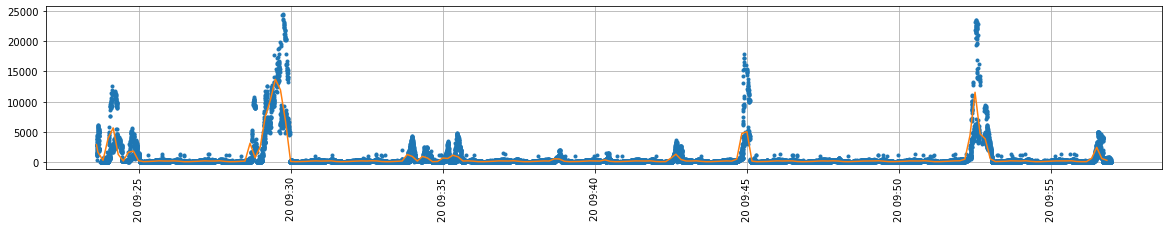

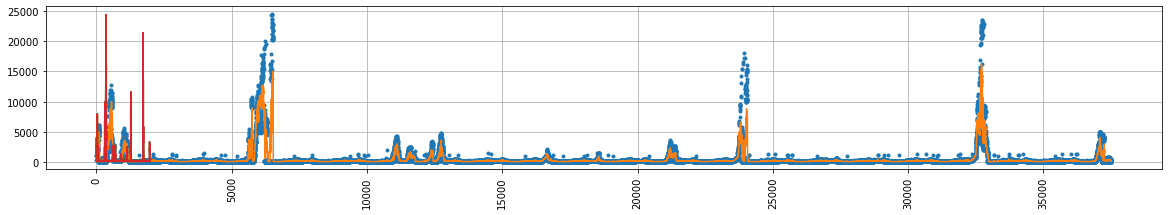

In [131]:
# Idő alapú
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.plot(md.values)
plt.plot(tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

In [169]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,09:23:43,09:23:4,3352.12430,2121.454114,1,3.5,48.6,49.3,50.7,...,109863.2,988064.0,2048.0,347312.0,100.0,48.9,48.9,42.6,48.4,42.6
1,192.168.0.6,09:23:50,09:23:5,5377.24090,1643.983272,2,11.4,93.5,3.8,96.2,...,109989.6,996090.8,2048.0,347354.0,100.0,68.8,68.8,70.3,68.8,70.4
2,192.168.0.6,09:24:00,09:24:0,614.68840,209.768952,3,18.7,90.9,7.1,92.8,...,109228.0,995050.0,2048.0,347337.6,100.0,45.4,45.4,44.2,45.4,44.3
3,192.168.0.6,09:24:13,09:24:1,4686.58645,1914.126807,1,8.8,97.5,0.2,99.8,...,109649.6,998286.8,2048.0,347364.8,100.0,54.4,54.4,50.7,54.4,50.7
4,192.168.0.6,09:24:27,09:24:2,10071.37840,3957.221233,1,7.3,97.6,0.0,100.0,...,109748.4,1004097.6,2048.0,347361.2,100.0,43.8,43.8,44.8,43.8,44.8


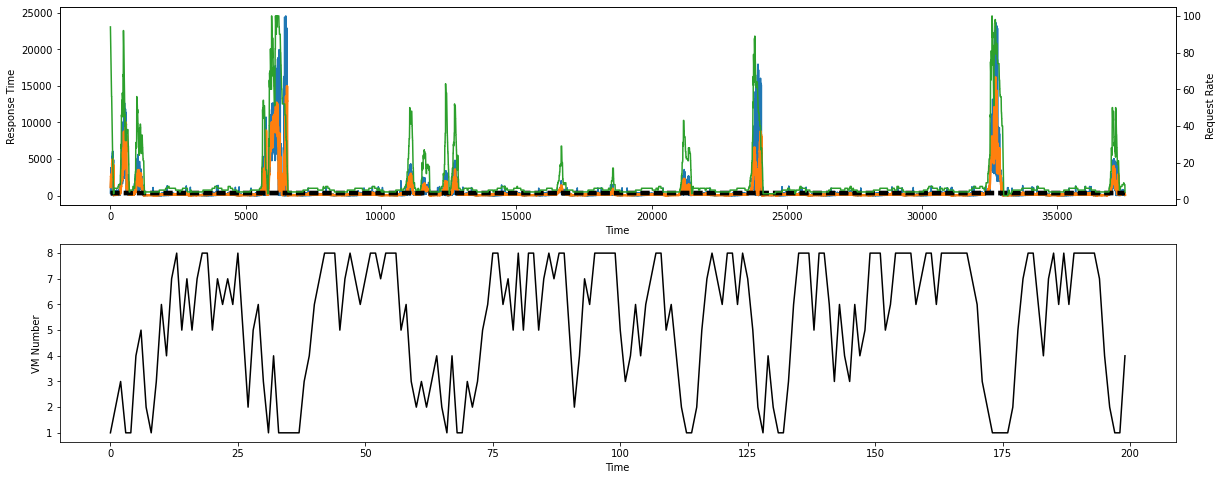

In [170]:
def jmf():
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(jf['Latency'], color = 'C0')
    
    ax1.plot(jf['ma10rt'], color = 'C1', lw = 2.5)
    
    ax1.plot(jf['RT_LIMIT_LOWER'], color = 'black', lw = 2.5, ls = '--')
    ax1.plot(jf['RT_LIMIT_UPPER'], color = 'black', lw = 2.5, ls = '--')
    

    ax2 = ax1.twinx()

    ax2.plot(jf['allThreads'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

jmf()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test25 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

In [171]:
from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

df['ntime'] = '2023-05-20 ' + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [172]:
df.head(3)

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,ntime,nntime
0,192.168.0.6,09:23:43,09:23:4,3352.1243,2121.454114,1,3.5,48.6,49.3,50.7,...,2048.0,347312.0,100.0,48.9,48.9,42.6,48.4,42.6,2023-05-20 09:23:40,2023-05-20 09:23:40
1,192.168.0.6,09:23:50,09:23:5,5377.2409,1643.983272,2,11.4,93.5,3.8,96.2,...,2048.0,347354.0,100.0,68.8,68.8,70.3,68.8,70.4,2023-05-20 09:23:50,2023-05-20 09:23:50
2,192.168.0.6,09:24:00,09:24:0,614.6884,209.768952,3,18.7,90.9,7.1,92.8,...,2048.0,347337.6,100.0,45.4,45.4,44.2,45.4,44.3,2023-05-20 09:24:00,2023-05-20 09:24:00


In [173]:
df.tail(3)

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,ntime,nntime
197,192.168.0.6,09:56:32,09:56:3,1663.3565,512.217079,1,16.4,96.6,0.8,99.2,...,2048.0,340384.0,100.0,88.2,88.2,85.2,88.2,85.2,2023-05-20 09:56:30,2023-05-20 09:56:30
198,192.168.0.6,09:56:42,09:56:4,4883.5350,2308.411372,1,12.1,97.2,0.1,99.9,...,2048.0,340386.8,100.0,87.4,87.4,83.8,86.9,83.4,2023-05-20 09:56:40,2023-05-20 09:56:40
199,192.168.0.6,09:56:50,09:56:5,3805.3724,575.096480,4,17.9,94.6,3.3,96.7,...,2048.0,340378.8,100.0,43.7,43.7,44.3,43.7,44.4,2023-05-20 09:56:50,2023-05-20 09:56:50


In [174]:
# 56:58

df.tail(10)

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,ntime,nntime
190,192.168.0.6,09:55:20,09:55:2,391.69980,167.693853,8,19.7,43.0,55.7,44.1,...,2048.0,340264.8,100.0,18.2,18.2,17.7,18.2,17.8,2023-05-20 09:55:20,2023-05-20 09:55:20
191,192.168.0.6,09:55:30,09:55:3,331.26550,157.551362,8,19.6,44.8,52.5,47.1,...,2048.0,340261.6,100.0,24.4,24.4,24.3,24.4,24.4,2023-05-20 09:55:30,2023-05-20 09:55:30
192,192.168.0.6,09:55:40,09:55:4,279.04230,165.644621,8,19.5,40.9,57.1,42.8,...,2048.0,340378.0,100.0,18.8,18.8,18.2,18.3,17.8,2023-05-20 09:55:40,2023-05-20 09:55:40
193,192.168.0.6,09:55:50,09:55:5,392.34020,183.070327,8,19.9,46.2,51.6,48.2,...,2048.0,340371.6,100.0,20.4,20.4,19.7,20.4,19.8,2023-05-20 09:55:50,2023-05-20 09:55:50
194,192.168.0.6,09:56:00,09:56:0,205.67560,81.178655,7,20.0,22.9,75.6,24.3,...,2048.0,340368.8,100.0,20.6,20.6,19.9,20.6,20.0,2023-05-20 09:56:00,2023-05-20 09:56:00
195,192.168.0.6,09:56:10,09:56:1,79.50785,39.461695,4,20.0,23.6,74.6,25.2,...,2048.0,340387.2,100.0,34.2,34.2,32.9,34.2,33.0,2023-05-20 09:56:10,2023-05-20 09:56:10
196,192.168.0.6,09:56:20,09:56:2,109.46420,50.734412,2,19.9,50.8,45.6,54.2,...,2048.0,340383.2,100.0,62.2,62.2,60.5,62.2,60.6,2023-05-20 09:56:20,2023-05-20 09:56:20
197,192.168.0.6,09:56:32,09:56:3,1663.35650,512.217079,1,16.4,96.6,0.8,99.2,...,2048.0,340384.0,100.0,88.2,88.2,85.2,88.2,85.2,2023-05-20 09:56:30,2023-05-20 09:56:30
198,192.168.0.6,09:56:42,09:56:4,4883.53500,2308.411372,1,12.1,97.2,0.1,99.9,...,2048.0,340386.8,100.0,87.4,87.4,83.8,86.9,83.4,2023-05-20 09:56:40,2023-05-20 09:56:40
199,192.168.0.6,09:56:50,09:56:5,3805.37240,575.096480,4,17.9,94.6,3.3,96.7,...,2048.0,340378.8,100.0,43.7,43.7,44.3,43.7,44.4,2023-05-20 09:56:50,2023-05-20 09:56:50


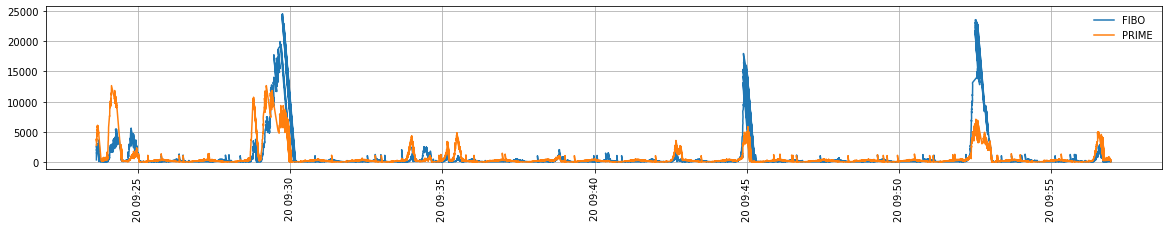

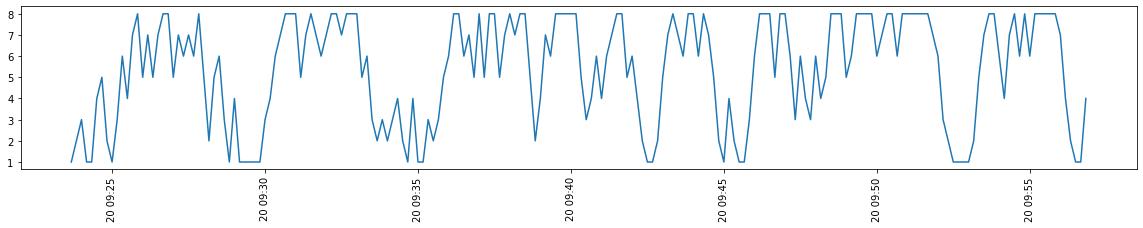

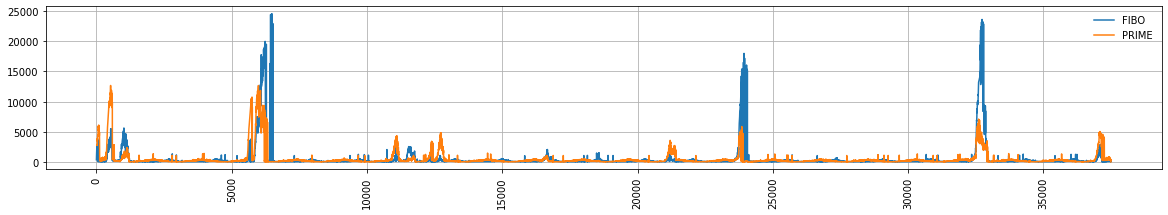

In [175]:
# Teljesen jó,

# Csupán az van hogy 3 plot van és a vízszintes méretük nem azonos ezért látszódik úgy, hogy az időpontok
# nincsenek szinkronban (1 és 2 plot)

plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'], label='FIBO')
plt.plot(PRIME['date'], PRIME['Latency'], label='PRIME')
plt.grid(b='on')
plt.xticks(rotation=90)
plt.legend(frameon=False)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(df['nntime'], df['worker_number'])
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'], label='FIBO')
plt.plot(PRIME['Latency'], label='PRIME')
plt.grid(b='on')
plt.xticks(rotation=90)
plt.legend(frameon=False)
plt.show()

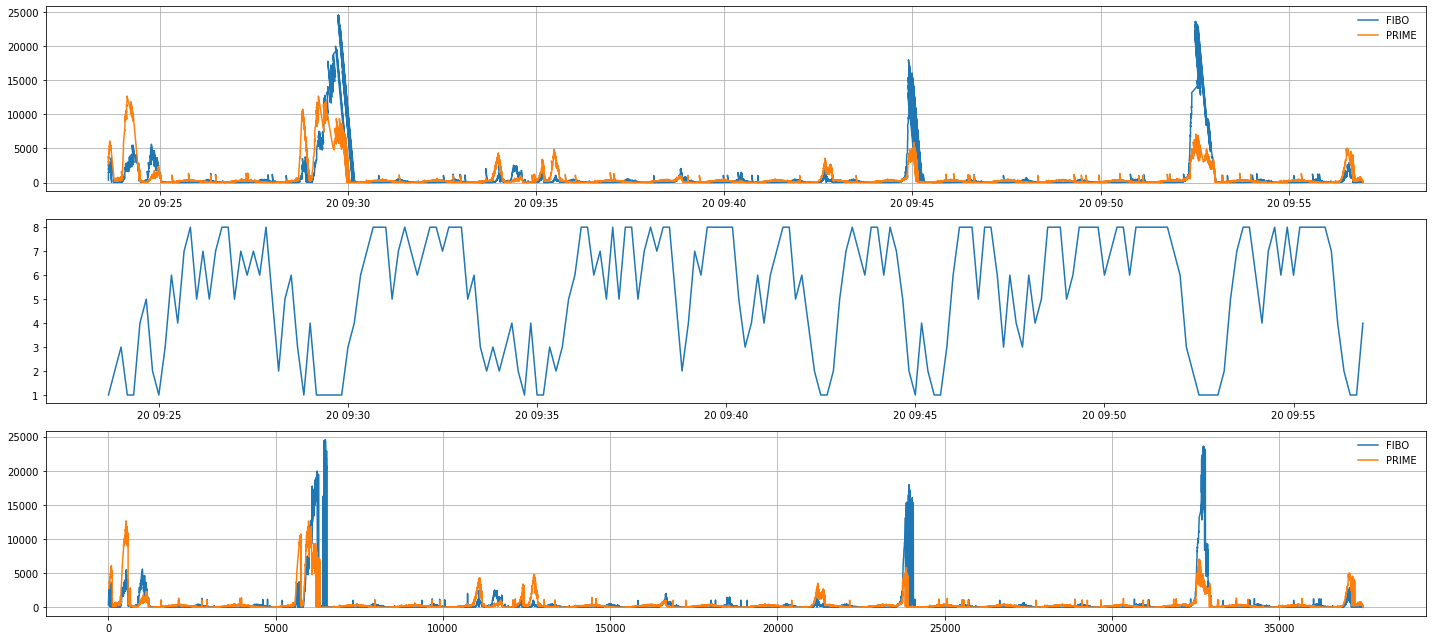

In [214]:
# Teljesen jó,

# Csupán az van hogy 3 plot van és a vízszintes méretük nem azonos ezért látszódik úgy, hogy az időpontok
# nincsenek szinkronban (1 és 2 plot)


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(FIBO['date'], FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax0.plot(PRIME['date'], PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax2.plot(PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

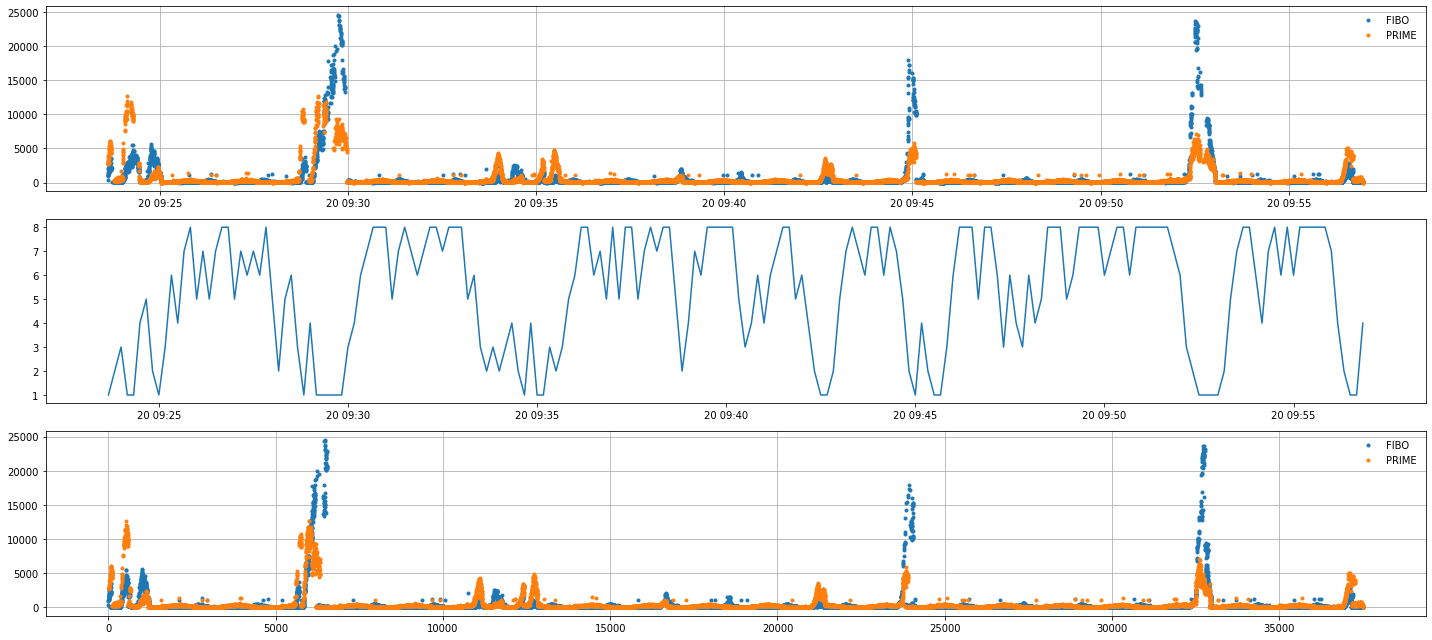

In [215]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [204]:
start_date = '2023-05-20 9:00'
end_date = '2023-05-20 9:30'

mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
F = FIBO.loc[mask]

F.shape

(3240, 21)

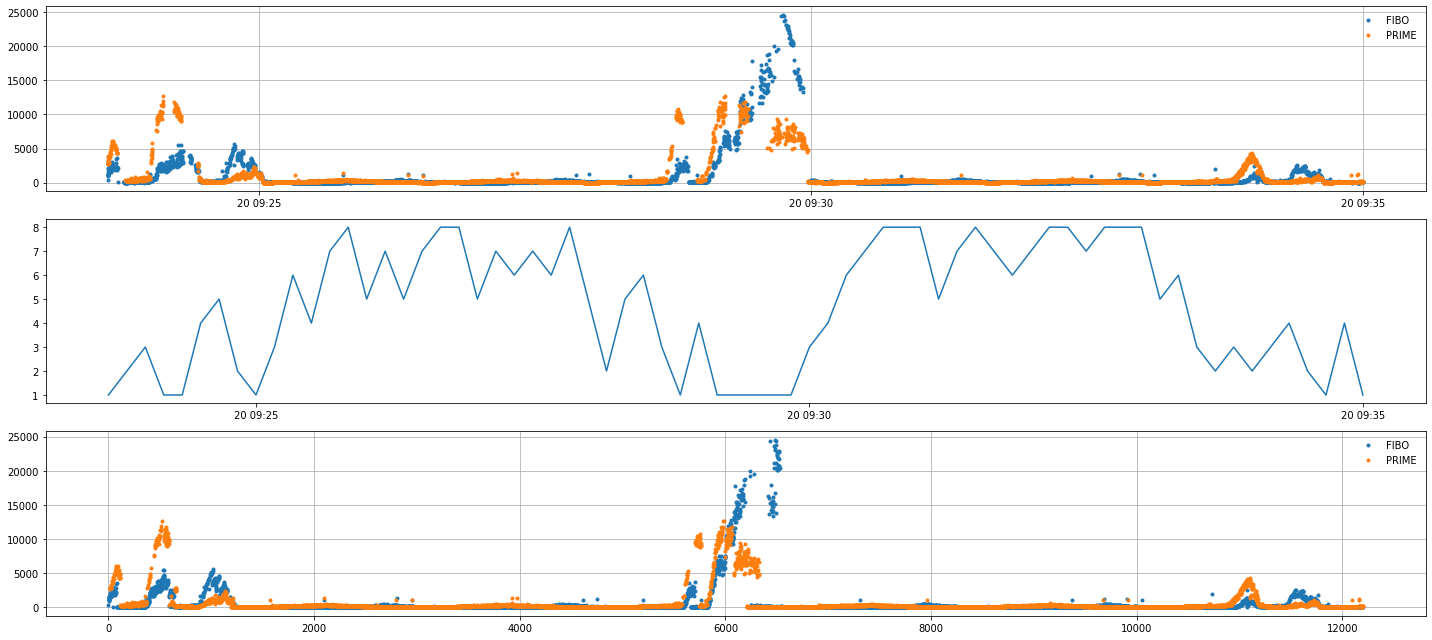

In [222]:
def zoom(start_date, end_date):

    mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
    F = FIBO.loc[mask]

    mask = (PRIME['date'] > start_date) & (PRIME['date'] <= end_date)
    P = PRIME.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(F['date'], F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax0.plot(P['date'], P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax2.plot(P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-05-20 8:59', '2023-05-20 9:35')

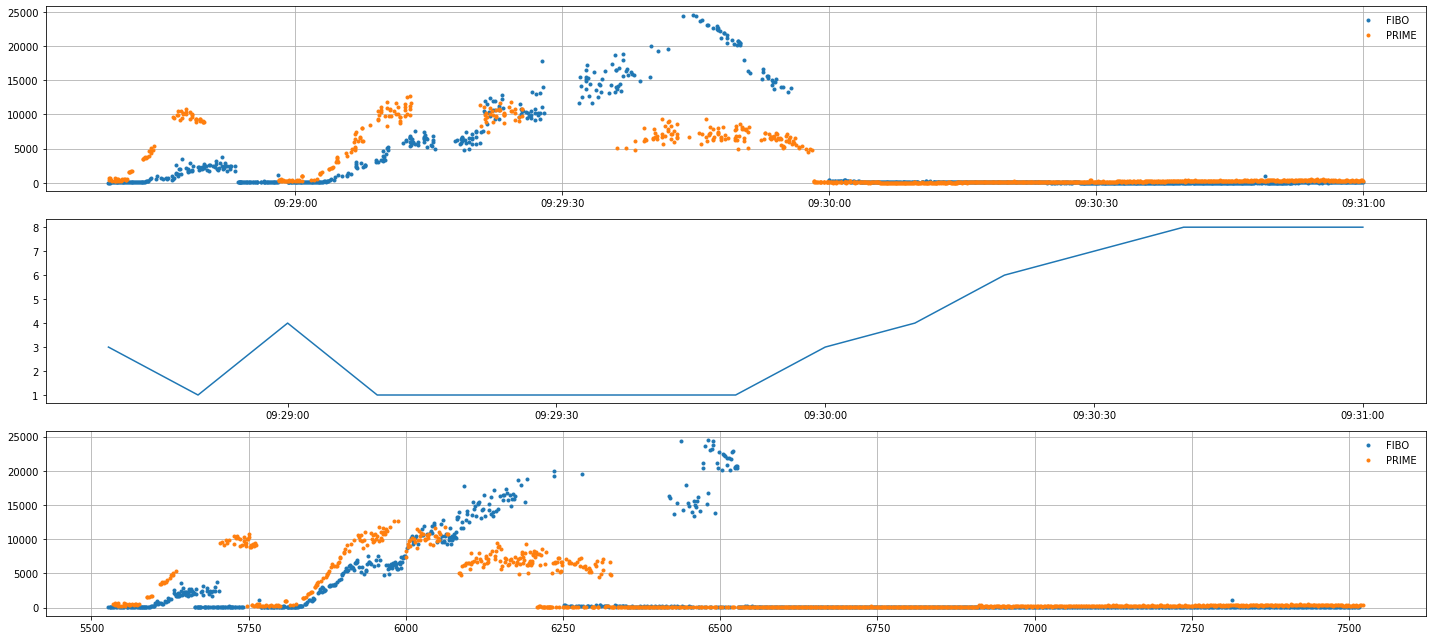

In [228]:
zoom('2023-05-20 9:28:39', '2023-05-20 9:31')

Hát azért így úgy tűnik, hogy magával húzza a másik REST API válaszidejét is.

## Helpers

In [ ]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)
